**Sales Prediction using Python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

- Loading the dataset

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


- Data cleaning and checking the data type, statistics details

In [3]:
data.shape

(200, 4)

In [4]:
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


- Relation and influence of TV, radio, newspaper on Sales

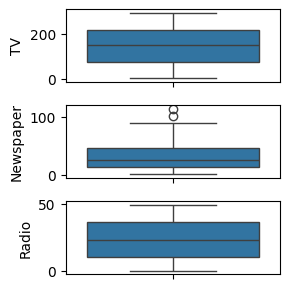

In [6]:
fig, axs = plt.subplots(3, figsize = (3,3))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

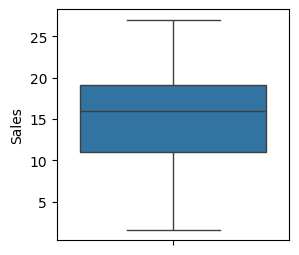

In [7]:
plt.figure(figsize=(3, 3))
sns.boxplot(data['Sales'])
plt.show()

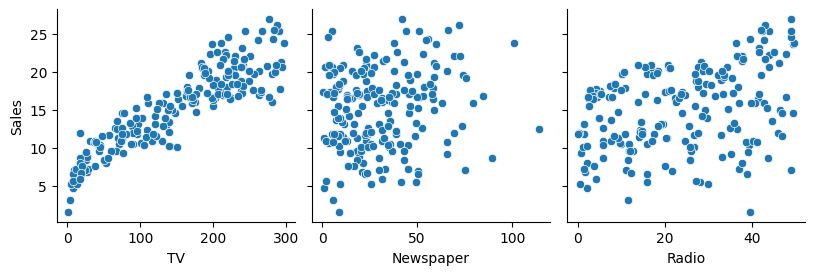

In [8]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=2.75, aspect=1, kind='scatter')
plt.show()

For the scatter plot, we can say that TV has influence more on sales, then radio. We will check by correlation plot

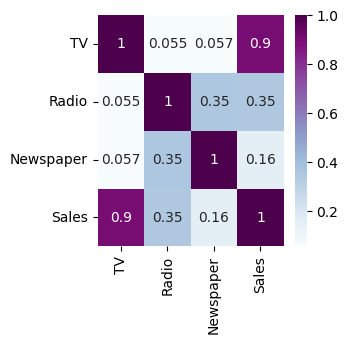

In [9]:
plt.figure(figsize=(3, 3))
sns.heatmap(data.corr(), cmap="BuPu", annot = True)
plt.show()

- Model Buliding

In [10]:
x = data.drop(["Sales"],axis = 1)
y = data["Sales"]

- Split the data into 95% training data and 5% testing data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state = 24)

In [12]:
print("x train shape = ",x_train.shape)
print("x test shape = ",x_test.shape)

x train shape =  (190, 3)
x test shape =  (10, 3)


- Buliding simple linear regression

   y = c + *m1* x1 + *m2* x2 + *m3* x3

   - y = sales
   - [x1,x2,x3] = [TV,Radio, Newspaper]
   - m1,m2,m3,c = unknown parameters which can be estimated by simple linear regression






In [13]:
constant_x = sm.add_constant(x_train)
model = sm.OLS(y_train,constant_x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     573.8
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.00e-93
Time:                        17:42:20   Log-Likelihood:                -365.47
No. Observations:                 190   AIC:                             738.9
Df Residuals:                     186   BIC:                             751.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5283      0.320     14.136      0.0

- Coefficients and significance(p-values)
  
  - The coef of TV is 0.054 with very low p-value. So it has some significant change with Sales

  - The coef of Radio is 0.109 with very low p-value. So it has some significant change with Sales

  - The coef of Newspaper is 0.0006 with very high p-value. So it does not has any significant change with Sales

- So we can eliminate the Newspaper, it does not have less influence in Sales.

 - Sales v/s TV

   - Sales = c1 + m1*TV
   - c1, m1 will be estimated by OLS

In [14]:
tv = data["TV"]
sales = data["Sales"]

tv_train, tv_test, sales_train, sales_test = train_test_split(tv,sales,test_size=0.3,random_state=24)

tv_train_sm = sm.add_constant(tv_train)
model1 = sm.OLS(sales_train,tv_train_sm).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     593.5
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           7.86e-52
Time:                        17:42:35   Log-Likelihood:                -317.62
No. Observations:                 140   AIC:                             639.2
Df Residuals:                     138   BIC:                             645.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9093      0.391     17.689      0.0

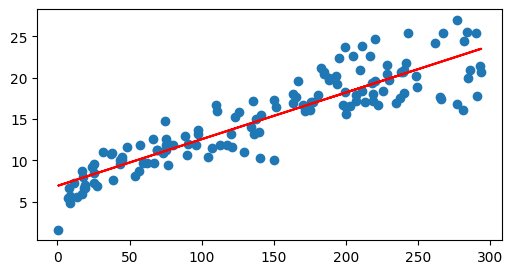

In [15]:
plt.figure(figsize=(6,3))
plt.scatter(tv_train, sales_train)
plt.plot(tv_train, 6.9093 + 0.0565*tv_train, 'r')
plt.show()

<ipython-input-16-be54dd234062>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


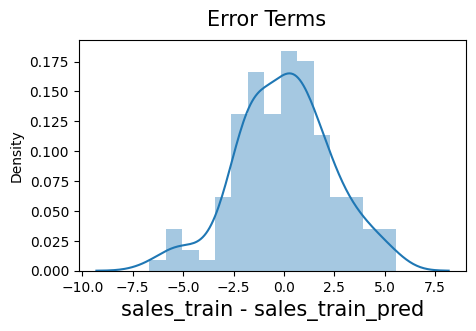

In [16]:
sales_train_pred = model1.predict(tv_train_sm)
res = (sales_train - sales_train_pred)

fig = plt.figure(figsize=(5,3))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('sales_train - sales_train_pred', fontsize = 15)         # X-label
plt.show()

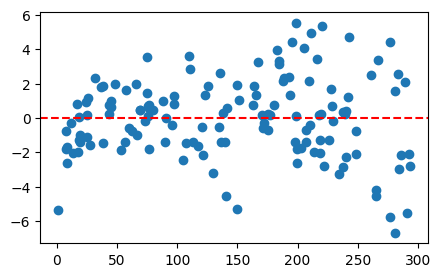

In [17]:
plt.figure(figsize=(5,3))
plt.scatter(tv_train,res)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [18]:
# Add a constant to tv_test
tv_test_sm = sm.add_constant(tv_test)

# Predict the y values corresponding to tv_test_sm
sales_pred = model1.predict(tv_test_sm)

#RMSE
print("RMSE = ",np.sqrt(mean_squared_error(sales_test, sales_pred)))

#R2 scored
r_squared = r2_score(sales_test, sales_pred)
print("R2 squared = ",r_squared)

RMSE =  2.164079586213682
R2 squared =  0.8120063673827431


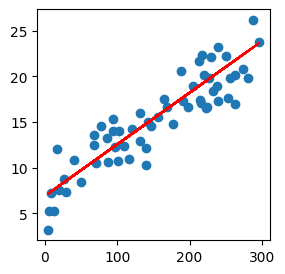

In [19]:
plt.figure(figsize = (3,3))
plt.scatter(tv_test, sales_test)
plt.plot(tv_test, 6.9093 + 0.0565* tv_test, 'r')
plt.show()

- Sales v/s Radio

   - Sales = c2 + m2*Radio
   - c2, m2 will be estimated by OLS

In [20]:
radio = data["Radio"]
sales = data["Sales"]

radio_train, radio_test, sales_train, sales_test = train_test_split(radio,sales,test_size=0.3,random_state=24)

radio_train_sm = sm.add_constant(radio_train)
model2 = sm.OLS(sales_train,radio_train_sm).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     21.44
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           8.34e-06
Time:                        17:43:24   Log-Likelihood:                -424.27
No. Observations:                 140   AIC:                             852.5
Df Residuals:                     138   BIC:                             858.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0564      0.783     15.402      0.0

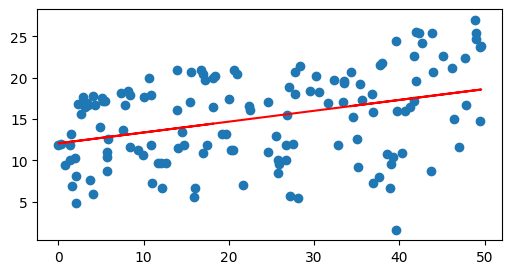

In [21]:
plt.figure(figsize=(6,3))
plt.scatter(radio_train, sales_train)
plt.plot(radio_train, 12.0564 + 0.1312*radio_train, 'r')
plt.show()

<ipython-input-22-3ee60f94eb1a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


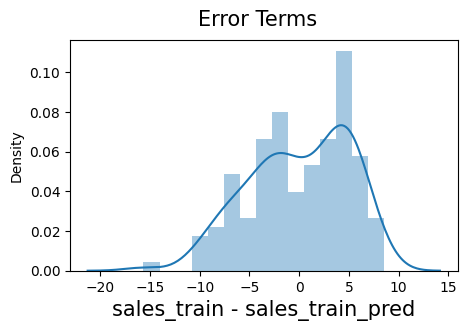

In [22]:
sales_train_pred = model2.predict(radio_train_sm)
res = (sales_train - sales_train_pred)

fig = plt.figure(figsize=(5,3))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('sales_train - sales_train_pred', fontsize = 15)         # X-label
plt.show()

In [23]:
# Add a constant to radio_test
radio_test_sm = sm.add_constant(radio_test)

# Predict the y values corresponding to tv_test_sm
sales_pred = model2.predict(radio_test_sm)

#RMSE
print("RMSE = ",np.sqrt(mean_squared_error(sales_test, sales_pred)))

#R2 scored
r_squared = r2_score(sales_test, sales_pred)
print("R2 squared = ",r_squared)

RMSE =  4.768393738212753
R2 squared =  0.08727299309242664


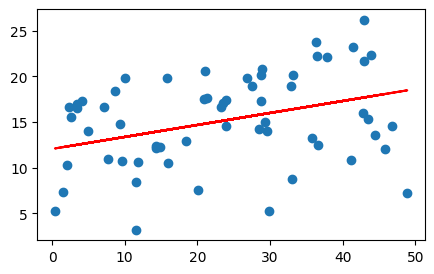

In [24]:
plt.figure(figsize = (5,3))
plt.scatter(radio_test, sales_test)
plt.plot(radio_test, 12.0564 + 0.1312*radio_test, 'r')
plt.show()

This function will predict the sales if we input the TV, Radio, and Newspaper.

In [69]:
def predict_sales(TV,Radio,Newspaper):
    const = 4.5283
    sales_predict = const + 0.0547*TV + 0.1090*Radio + 0.0006*Newspaper
    return sales_predict

In [ ]:
sales1 = predict_sales(17.2,45.9,69.3)
print("Sales 1 =", sales1)

sales2 = predict_sales(151.5,41.3,58.5)
print("Sales 2 =", sales2)